In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show Code"></form>''')

In [2]:
# Import useful libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from collections import defaultdict

import matplotlib as mpl
import seaborn as sns

sns.set(style ='white',font_scale=1.25)

%matplotlib inline

In [3]:
with open('../data/01-House-Price/wrangled_data.pkl','rb') as file:
    housing_orig, FEATURES = pickle.load(file)

In [4]:
housing = housing_orig.copy()
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType,SaleCondition,SalePrice,log1p(SalePrice),log1p(GrLivArea),Lat,Lng,zipcode,median_household_income,median_home_value
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,...,WD,Normal,208500,12.247699,7.444833,42.022197,-93.651510,50010.0,48189.0,165300.0
2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,...,WD,Normal,181500,12.109016,7.141245,42.041304,-93.650302,50011.0,48189.0,165300.0
3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,...,WD,Normal,223500,12.317171,7.488294,42.022197,-93.651510,50010.0,48189.0,165300.0
4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,...,WD,Abnorml,140000,11.849405,7.448916,42.018614,-93.648898,50014.0,37661.0,212500.0
5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,...,WD,Normal,250000,12.429220,7.695758,42.053510,-93.648636,50010.0,48189.0,165300.0


## **Feature Engneering**


### **Ordinal ecoding**: Description of following categorical feature indicate they have ordinal categories
- LandSlope
- ExterQual
- ExterCond
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- HeatingQC
- KitchenQual
- FireplaceQu
- GarageFinish
- GarageQual
- GarageCond
- PavedDrive
- PoolQC

In [5]:
ordinal_map = {'LandSlope':{'Gtl':0,'Mod':1,'Sev':2},
               'ExterQual':{'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0},
               'ExterCond':{'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0},
               'BsmtQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Missing':0}, # Houses that don't have a basement are assigned Typical/Average rating
               'BsmtCond':{'Gd':4, 'TA':3, 'Fa':2, 'Po':1,'Missing':0},
               'BsmtExposure':{'Gd':4,'Av':3,'Mn':2,'No':1,'Missing':0},
               'BsmtFinType1': {'Missing': 0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
               'BsmtFinType2': {'Missing': 0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
               'HeatingQC':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
               'KitchenQual':{'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0},
               'FireplaceQu':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Missing':0},
               'GarageFinish':{'Fin':3, 'RFn':2, 'Unf':1, 'Missing':0},
               'GarageQual':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'Missing':0},
               'GarageCond':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'Missing':0},
               'PavedDrive':{'Y':2, 'P':1, 'N':0},
               'PoolQC':{'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Missing':0}}

In [6]:
housing_cat_encoded = housing[FEATURES['cat']].replace(ordinal_map)
# convert the ordinal features to numeric data type (float)
for col in housing_cat_encoded[list(ordinal_map.keys())]:
    housing_cat_encoded[col] = housing_cat_encoded[col].astype(float)
housing_cat_encoded[ordinal_map.keys()].head()

,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC
Id,,,,,,,,,,,,,,,,
1,0.0,3.0,2.0,4.0,3.0,1.0,6.0,1.0,4.0,3.0,0.0,2.0,3.0,3.0,2.0,0.0
2,0.0,2.0,2.0,4.0,3.0,4.0,5.0,1.0,4.0,2.0,3.0,2.0,3.0,3.0,2.0,0.0
3,0.0,3.0,2.0,4.0,3.0,2.0,6.0,1.0,4.0,3.0,3.0,2.0,3.0,3.0,2.0,0.0
4,0.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,3.0,3.0,4.0,1.0,3.0,3.0,2.0,0.0
5,0.0,3.0,2.0,4.0,3.0,3.0,6.0,1.0,4.0,3.0,3.0,2.0,3.0,3.0,2.0,0.0


### **One hot ecoding**: one hot encode following features

- MSSubClass
- MSZoning
- Street
- Alley
- LotShape
- LandContour
- Utilities
- LotConfig
- Neighborhood
- Condition1
- Condition2
- BldgType
- HouseStyle
- RoofStyle
- RoofMatl
- Exterior1st
- Exterior2nd
- MasVnrType
- Foundation
- Heating
- CentralAir
- Electrical
- Functional
- GarageType
- Fence
- MiscFeature
- SaleType
- SaleCondition

In [7]:
housing_cat_encoded = pd.get_dummies(housing_cat_encoded,drop_first=True)

In [8]:
FEATURES['encoded_cat'] = []
for col in housing_cat_encoded.columns:
    FEATURES['encoded_cat'].append(col)

### Prepare the training set

In [9]:
train = pd.concat([housing_cat_encoded,housing[FEATURES['num']]],axis=1)
y = housing['log1p(SalePrice)']

### **Adding interactions**
- Check pairwise feature correlations
- Create interaction of feature pairs with high correlations (>0.4)

In [10]:
corr_df = train.corr()

In [11]:
''' Create a dictionary with feature pairs as keys and their correlations as values'''
corr_dict = {}
for key, val in corr_df.unstack().to_dict().items():
    if (key == key[::-1]) or (key in corr_dict) or (key[::-1] in corr_dict):
        pass
    else:
        corr_dict[key] = val

In [12]:
'''Find feature pairs with corr > 0.4'''
high_corr_dict = {}
targetCorr = 0.4
for key, val in corr_dict.items():
    if val > targetCorr:
        high_corr_dict[key] = val
        
print('Total pairs with corr greater than %.2f: %i' %(targetCorr,len(high_corr_dict)))

'''Sort corr dict in descending order'''
from collections import OrderedDict
high_corr_dict = OrderedDict(sorted(high_corr_dict.items(), key=lambda x: x[1],reverse=True))
#print(high_corr_dict)

Total pairs with corr greater than 0.40: 216


In [13]:
interactions = []
for feat1, feat2 in high_corr_dict:
    train['X'.join([feat1,feat2])] = train[feat1] * train[feat2]
    interactions.append('X'.join([feat1,feat2]))

## **Correlation with the target variable**

High correlations with newly engineered feature is a good indication.

In [22]:
train.corrwith(y,method='spearman').sort_values(ascending=False)

OverallQualXlog1p(GrLivArea)               0.859512
OverallQualXGrLivArea                      0.853621
KitchenQualXGrLivArea                      0.835965
ExterQualXGrLivArea                        0.835361
OverallQualXGarageCars                     0.833240
OverallQualXYearBuilt                      0.828259
OverallQualXYearRemodAdd                   0.825150
ExterQualXlog1p(GrLivArea)                 0.822903
ExterQualXOverallQual                      0.818428
BsmtQualXOverallQual                       0.817425
OverallQualXGarageYrBlt                    0.815093
OverallQual                                0.813875
KitchenQualXOverallQual                    0.813739
GrLivAreaXGarageCars                       0.810813
OverallQualXFullBath                       0.810122
KitchenQualXlog1p(GrLivArea)               0.807933
OverallQualXGarageArea                     0.802930
GarageCarsXlog1p(GrLivArea)                0.801347
GrLivAreaXGarageArea                       0.797965
OverallQualX

In [23]:
##with open('../data/01-House-Price/FE_data.pkl','wb') as file:
#    pickle.dump((FEATURES,ordinal_map,interactions,train,y),file)

## **Building ML model**

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=42)

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1010, 445)
X_test : (433, 445)
y_train : (1010,)
y_test : (433,)


# **Feature Standardizing**
- Perform standardization on all features except those one hot encoded.

In [25]:
feat_to_norm = FEATURES['cont'] + list(ordinal_map.keys()) + [inter for inter in interactions if len(inter.split('_')) < 3]

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train[feat_to_norm])

X_num_train_norm = pd.DataFrame(ss.transform(X_train[feat_to_norm]),columns=feat_to_norm,index=X_train.index)
X_cat_train = X_train[[col for col in X_train.columns if col not in feat_to_norm]]
X_train_preproc = pd.concat([X_num_train_norm,X_cat_train],axis=1)

X_num_test_norm = pd.DataFrame(ss.transform(X_test[feat_to_norm]),columns=feat_to_norm,index=X_test.index)
X_cat_test = X_test[[col for col in X_test.columns if col not in feat_to_norm]]
X_test_preproc = pd.concat([X_num_test_norm,X_cat_test],axis=1)

In [27]:
from collections import namedtuple

models = namedtuple('models',['name','params',
                              'cv5_mean_accuracy_train','cv5_std_accuracy_train',
                              'cv5_mean_accuracy_test','cv5_std_accuracy_test'])
model_list = []

## **Linear Regression**

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score

In [29]:
def cv_rmse(mod,X,y,cv=5):
    scores = cross_val_score(mod,X,y,scoring="neg_mean_squared_error",cv=cv)
    return np.sqrt(-scores)

In [30]:
lr = LinearRegression()
lr.fit(X_train_preproc,y_train)


y_train_pred = lr.predict(X_train_preproc)
y_test_pred = lr.predict(X_test_preproc)

print('Train R-sq:',r2_score(y_train,y_train_pred))
print('Test R-sq:',r2_score(y_test,y_test_pred))

Train R-sq: 0.9650466876100863
Test R-sq: 0.821431546586311


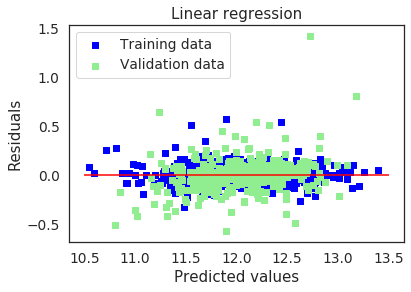

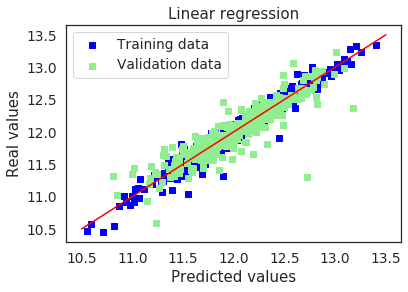

In [31]:
# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")

In [32]:
cv5_accuracy_train =  cv_rmse(lr, X_train_preproc, y_train, cv=5)
cv5_accuracy_test =  cv_rmse(lr, X_test_preproc, y_test, cv=5)

print('CV5 train accuracies:',cv5_accuracy_train)
print('-'*75)
print('CV5 test accuracies:', cv5_accuracy_test)

model_list.append(models(name='LR',params=lr.get_params(),
                         cv5_mean_accuracy_train = np.mean(cv5_accuracy_train),
                         cv5_std_accuracy_train=np.std(cv5_accuracy_train),
                         cv5_mean_accuracy_test=np.mean(cv5_accuracy_test),
                         cv5_std_accuracy_test=np.std(cv5_accuracy_test)))

CV5 train accuracies: [0.1879633  0.52650426 0.16086904 0.20577652 0.15715511]
---------------------------------------------------------------------------
CV5 test accuracies: [ 5.72400422 13.49256233 17.31535597  2.97121579  7.43867032]


## **Linear Regression with Ridge regularization (L2 penatly)**

In [33]:
from sklearn.linear_model import RidgeCV, Ridge

ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train_preproc, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 30.0


In [34]:
ridge = Ridge(alpha=1)
ridge.fit(X_train_preproc, y_train)
y_pred = ridge.predict(X_test_preproc)

print('Test accuracies:')
print('-'*50)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq orig price:', r2_score(y_test_exp, y_pred_exp))
print('MSE orig price:', mean_squared_error(y_test_exp, y_pred_exp))
print('RMSE orig price:', np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))

Test accuracies:
--------------------------------------------------
R-sq: 0.9003353960621235
MSE: 0.01388305602866811
RMSE: 0.11782638086892133
--------------------------------------------------
R-sq orig price: 0.9041213829951165
MSE orig price: 477346104.9842521
RMSE orig price: 21848.25176036408


/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.79961e-21): result may not be accurate.
  overwrite_a=True).T


In [35]:
ridge = Ridge(alpha=30)
ridge.fit(X_train_preproc, y_train)
y_pred = ridge.predict(X_test_preproc)

print('Test accuracies:')
print('-'*50)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq orig price:', r2_score(y_test_exp, y_pred_exp))
print('MSE orig price:', mean_squared_error(y_test_exp, y_pred_exp))
print('RMSE orig price:', np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))

Test accuracies:
--------------------------------------------------
R-sq: 0.9134064562897696
MSE: 0.012062286624842274
RMSE: 0.10982844178464099
--------------------------------------------------
R-sq orig price: 0.9137025938458079
MSE orig price: 429644606.7411405
RMSE orig price: 20727.87028956763


/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.21156e-20): result may not be accurate.
  overwrite_a=True).T


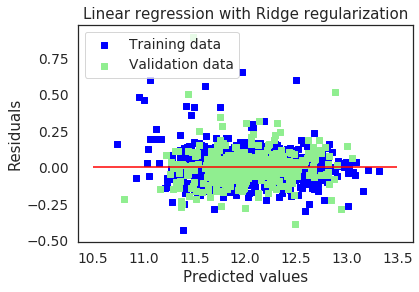

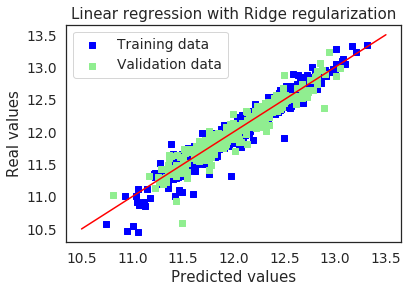

Ridge picked 440 features and eliminated the other 5 features


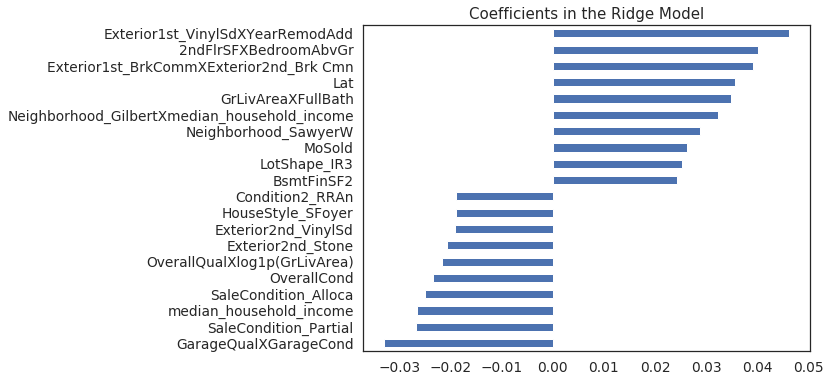

In [36]:
y_train_rdg = ridge.predict(X_train_preproc)
y_test_rdg = ridge.predict(X_test_preproc)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh",figsize=(8,6))
plt.title("Coefficients in the Ridge Model");

In [37]:
cv5_accuracy_train =  cv_rmse(ridge, X_train_preproc, y_train, cv=5)
cv5_accuracy_test =  cv_rmse(ridge, X_test_preproc, y_test, cv=5)

print('CV5 train R-sq:',cv5_accuracy_train)
print('-'*75)
print('CV5 test R-sq:', cv5_accuracy_test)

model_list.append(models(name='ridge',params=ridge.get_params(),
                         cv5_mean_accuracy_train = np.mean(cv5_accuracy_train),
                         cv5_std_accuracy_train=np.std(cv5_accuracy_train),
                         cv5_mean_accuracy_test=np.mean(cv5_accuracy_test),
                         cv5_std_accuracy_test=np.std(cv5_accuracy_test)))

/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.08849e-20): result may not be accurate.
  overwrite_a=True).T
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.79505e-20): result may not be accurate.
  overwrite_a=True).T
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.72508e-20): result may not be accurate.
  overwrite_a=True).T
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.25519e-20): result may not be accurate.
  overwrite_a=True).T
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.09983e-20): result may not be accurate.
  overwrite_a=True).T
/home/climbach/

CV5 train R-sq: [0.10477156 0.11773618 0.10457172 0.14666793 0.09988603]
---------------------------------------------------------------------------
CV5 test R-sq: [0.35428302 0.19655722 0.4772603  0.41906941 0.42951177]


/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


## **Linear Regression with Lasso regularization (L1 penalty)**

In [38]:
from sklearn.linear_model import LassoCV, Lasso

In [39]:
lasso = Lasso(alpha=1)
lasso.fit(X_train_preproc, y_train)
y_pred = lasso.predict(X_test_preproc)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq orig price:', r2_score(y_test_exp, y_pred_exp))
print('MSE orig price:', mean_squared_error(y_test_exp, y_pred_exp))
print('RMSE orig price:', np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))

R-sq: 0.8136496653868723
MSE: 0.02595818409119165
RMSE: 0.16111543715979437
--------------------------------------------------
R-sq orig price: 0.8092200284123943
MSE orig price: 949826762.1206021
RMSE orig price: 30819.259597216187


/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.655302276628202, tolerance: 0.016279907156276183
  positive)


In [40]:
lasso = Lasso(alpha=0.0003)
lasso.fit(X_train_preproc, y_train)
y_pred = lasso.predict(X_test_preproc)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq orig price:', r2_score(y_test_exp, y_pred_exp))
print('MSE orig price:', mean_squared_error(y_test_exp, y_pred_exp))
print('RMSE orig price:', np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))

R-sq: 0.9145273342963806
MSE: 0.011906150829863526
RMSE: 0.10911530978677339
--------------------------------------------------
R-sq orig price: 0.9160276908735048
MSE orig price: 418068761.7346876
RMSE orig price: 20446.729854299138


/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.293638907464091, tolerance: 0.016279907156276183
  positive)


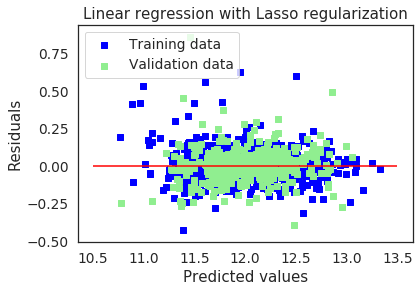

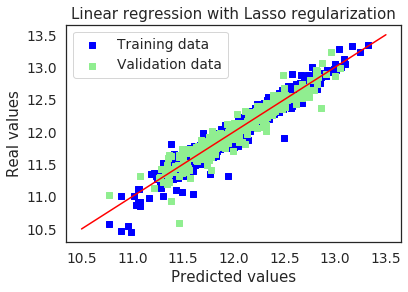

Lasso picked 186 features and eliminated the other 259 features


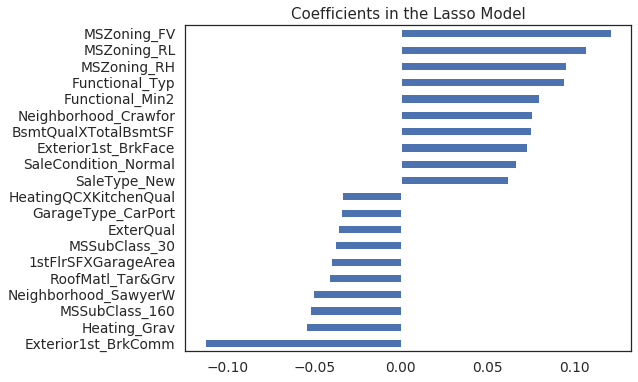

In [41]:
y_train_las = lasso.predict(X_train_preproc)
y_test_las = lasso.predict(X_test_preproc)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train_preproc.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh",figsize=(8,6))
plt.title("Coefficients in the Lasso Model");

In [42]:
cv5_accuracy_train =  cv_rmse(lasso, X_train_preproc, y_train, cv=5)
cv5_accuracy_test = cv_rmse(lasso, X_test_preproc, y_test, cv=5)

print('CV5 train R-sq:',cv5_accuracy_train)
print('-'*75)
print('CV5 test R-sq:', cv5_accuracy_test)

model_list.append(models(name='lasso',params=lasso.get_params(),
                         cv5_mean_accuracy_train = np.mean(cv5_accuracy_train),
                         cv5_std_accuracy_train=np.std(cv5_accuracy_train),
                         cv5_mean_accuracy_test=np.mean(cv5_accuracy_test),
                         cv5_std_accuracy_test=np.std(cv5_accuracy_test)))

/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.240853930681643, tolerance: 0.013795237924590231
  positive)
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.963211142120197, tolerance: 0.012943336987437614
  positive)
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.225550881369123, tolerance: 0.013157892506500804
  positive)
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to

CV5 train R-sq: [0.1065528  0.11845077 0.10593694 0.14341775 0.10270357]
---------------------------------------------------------------------------
CV5 test R-sq: [0.1338236  0.10908658 0.13896864 0.11066229 0.11006018]


/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0404482432435698, tolerance: 0.004803317500323421
  positive)
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0271650389738067, tolerance: 0.005124729527928506
  positive)


## **Linear Regression with ElasticNet Regularization (L1 and L2 penalty)**

In [43]:
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.model_selection import RandomizedSearchCV

In [44]:
enet = ElasticNet(alpha=1,l1_ratio=0.5)
enet.fit(X_train_preproc,y_train)
y_pred = enet.predict(X_test_preproc)

print('R-sq:', r2_score(y_test,y_pred))
print('MSE:', mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))

y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq:', r2_score(y_test_exp,y_pred_exp))
print('MSE:', mean_squared_error(y_test_exp,y_pred_exp))
print('RMSE:', np.sqrt(mean_squared_error(y_test_exp,y_pred_exp)))

R-sq: 0.8257527527432964
MSE: 0.02427225113957088
RMSE: 0.155795542746161
--------------------------------------------------
R-sq: 0.8249030494543257
MSE: 871746484.7593763
RMSE: 29525.35325376102


/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.941420848911807, tolerance: 0.016279907156276183
  positive)


In [45]:
enet = ElasticNet(l1_ratio=0,alpha=0.03)
enet.fit(X_train_preproc,y_train)
y_pred = enet.predict(X_test_preproc)

print('R-sq:', r2_score(y_test,y_pred))
print('MSE:', mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))

y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq:', r2_score(y_test_exp,y_pred_exp))
print('MSE:', mean_squared_error(y_test_exp,y_pred_exp))
print('RMSE:', np.sqrt(mean_squared_error(y_test_exp,y_pred_exp)))

R-sq: 0.9130349063112119
MSE: 0.01211404270439267
RMSE: 0.11006381196557145
--------------------------------------------------
R-sq: 0.9129018193389796
MSE: 433631382.97703147
RMSE: 20823.817684973892


/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.386909462543727, tolerance: 0.016279907156276183
  positive)


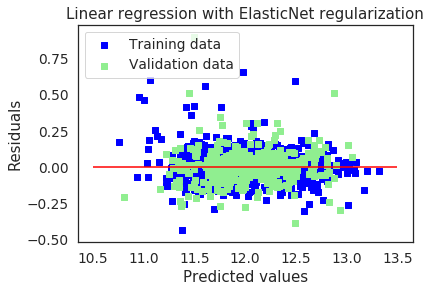

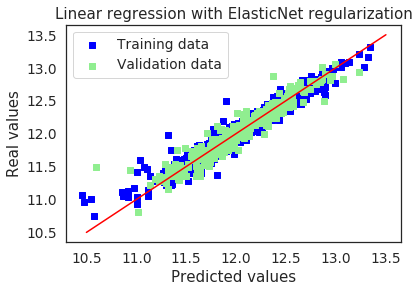

ElasticNet picked 440 features and eliminated the other 5 features


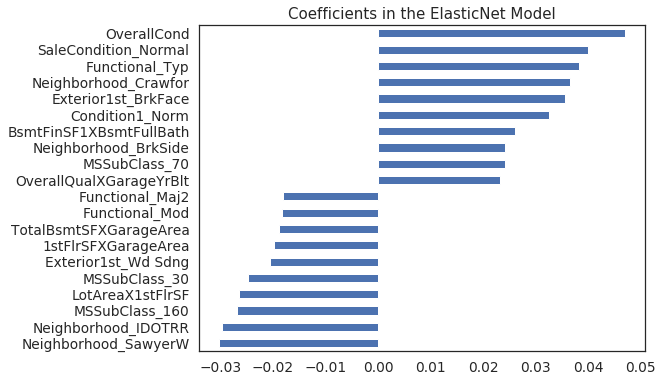

In [46]:
y_train_ela = enet.predict(X_train_preproc)
y_test_ela = enet.predict(X_test_preproc)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(enet.coef_, index = X_train_preproc.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh",figsize=(8,6))
plt.title("Coefficients in the ElasticNet Model");

In [47]:
cv5_accuracy_train =  cv_rmse(enet, X_train_preproc, y_train, cv=5)
cv5_accuracy_test =  cv_rmse(enet, X_test_preproc, y_test, cv=5)

print('CV5 train R-sq:',cv5_accuracy_train)
print('-'*75)
print('CV5 test R-sq:', cv5_accuracy_test)

model_list.append(models(name='ElasticNet',params=enet.get_params(),
                         cv5_mean_accuracy_train = np.mean(cv5_accuracy_train),
                         cv5_std_accuracy_train=np.std(cv5_accuracy_train),
                         cv5_mean_accuracy_test=np.mean(cv5_accuracy_test),
                         cv5_std_accuracy_test=np.std(cv5_accuracy_test)))

/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.388033081651992, tolerance: 0.013795237924590231
  positive)
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.070427593967666, tolerance: 0.012943336987437614
  positive)
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.347341599882508, tolerance: 0.013157892506500804
  positive)
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to

CV5 train R-sq: [0.10472496 0.11744123 0.10574563 0.14612587 0.09930025]
---------------------------------------------------------------------------
CV5 test R-sq: [0.13075885 0.1044385  0.13285132 0.097538   0.10480744]


/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.185030448351542, tolerance: 0.005124729527928506
  positive)


## **Support Vector Machine Regression**

## **Random Forest**

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print('R-sq:',r2_score(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))

y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq:',r2_score(y_test_exp,y_pred_exp))
print('MSE:',mean_squared_error(y_test_exp,y_pred_exp))
print('RMSE:',np.sqrt(mean_squared_error(y_test_exp,y_pred_exp)))

R-sq: 0.8818611951474473
MSE: 0.016456470824388284
RMSE: 0.12828277680338965
--------------------------------------------------
R-sq: 0.8871912487500518
MSE: 561635322.864089
RMSE: 23698.84644585236


In [50]:
feature_importance = pd.DataFrame(np.round(rf.feature_importances_,decimals=4),
                                  index=X_train.columns,columns=['importance']).sort_values(by='importance',
                                                                                            ascending=False)
feature_importance.index.name = 'feature'
feature_importance.reset_index(inplace =True)

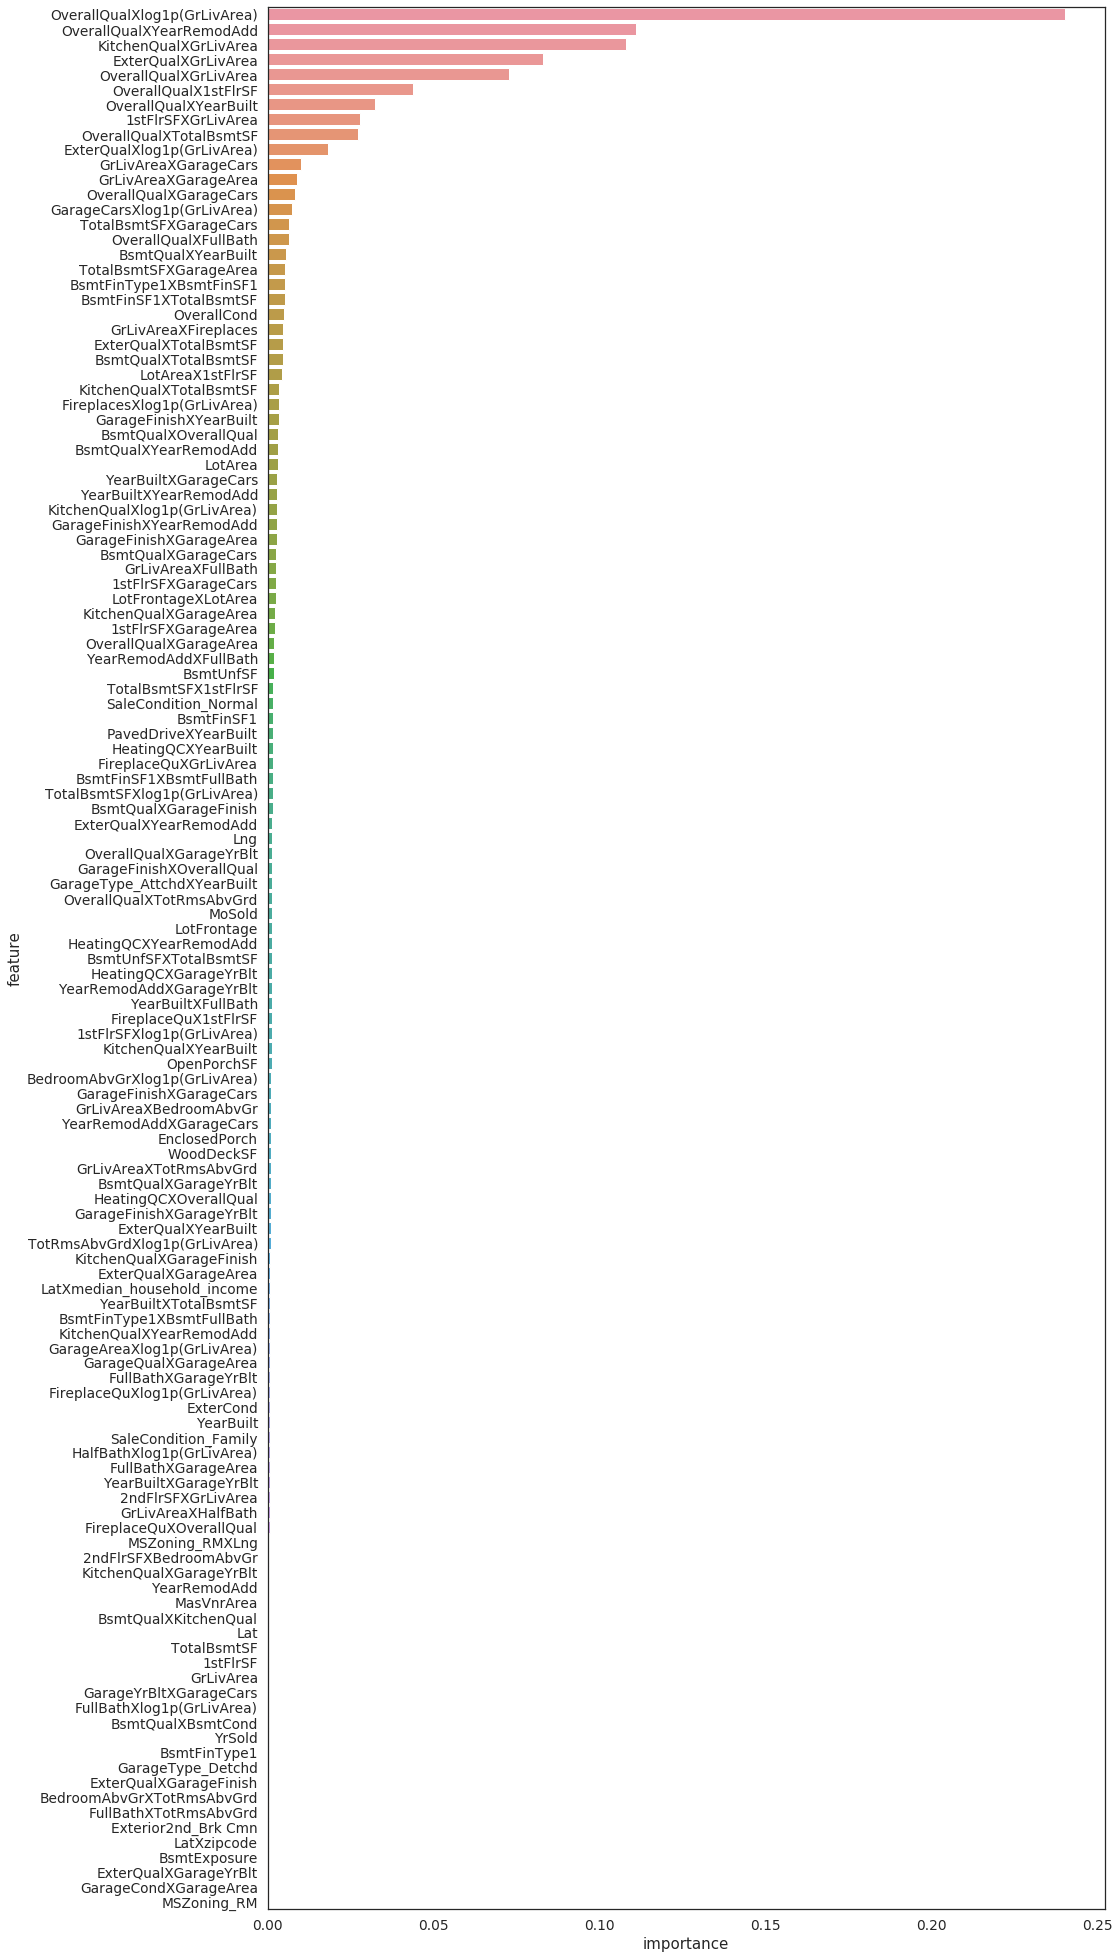

In [51]:
plt.figure(figsize=(15,35))
sns.barplot(y='feature',x='importance',data=feature_importance[feature_importance['importance']>0.0003],orient='h')

In [52]:
rf = RandomForestRegressor(n_estimators=200,
                           max_depth=75,
                           min_samples_leaf=3,
                           min_samples_split=4)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print('R-sq:',r2_score(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))

y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq:',r2_score(y_test_exp,y_pred_exp))
print('MSE:',mean_squared_error(y_test_exp,y_pred_exp))
print('RMSE:',np.sqrt(mean_squared_error(y_test_exp,y_pred_exp)))

R-sq: 0.8839736638807392
MSE: 0.016162208662855164
RMSE: 0.12713067553842056
--------------------------------------------------
R-sq: 0.8892431666867153
MSE: 551419541.0202211
RMSE: 23482.32401233364


In [53]:
feature_importance = pd.DataFrame(np.round(rf.feature_importances_,decimals=4),
                                  index=X_train.columns,columns=['importance']).sort_values(by='importance',
                                                                                            ascending=False)
feature_importance.index.name = 'feature'
feature_importance.reset_index(inplace =True)

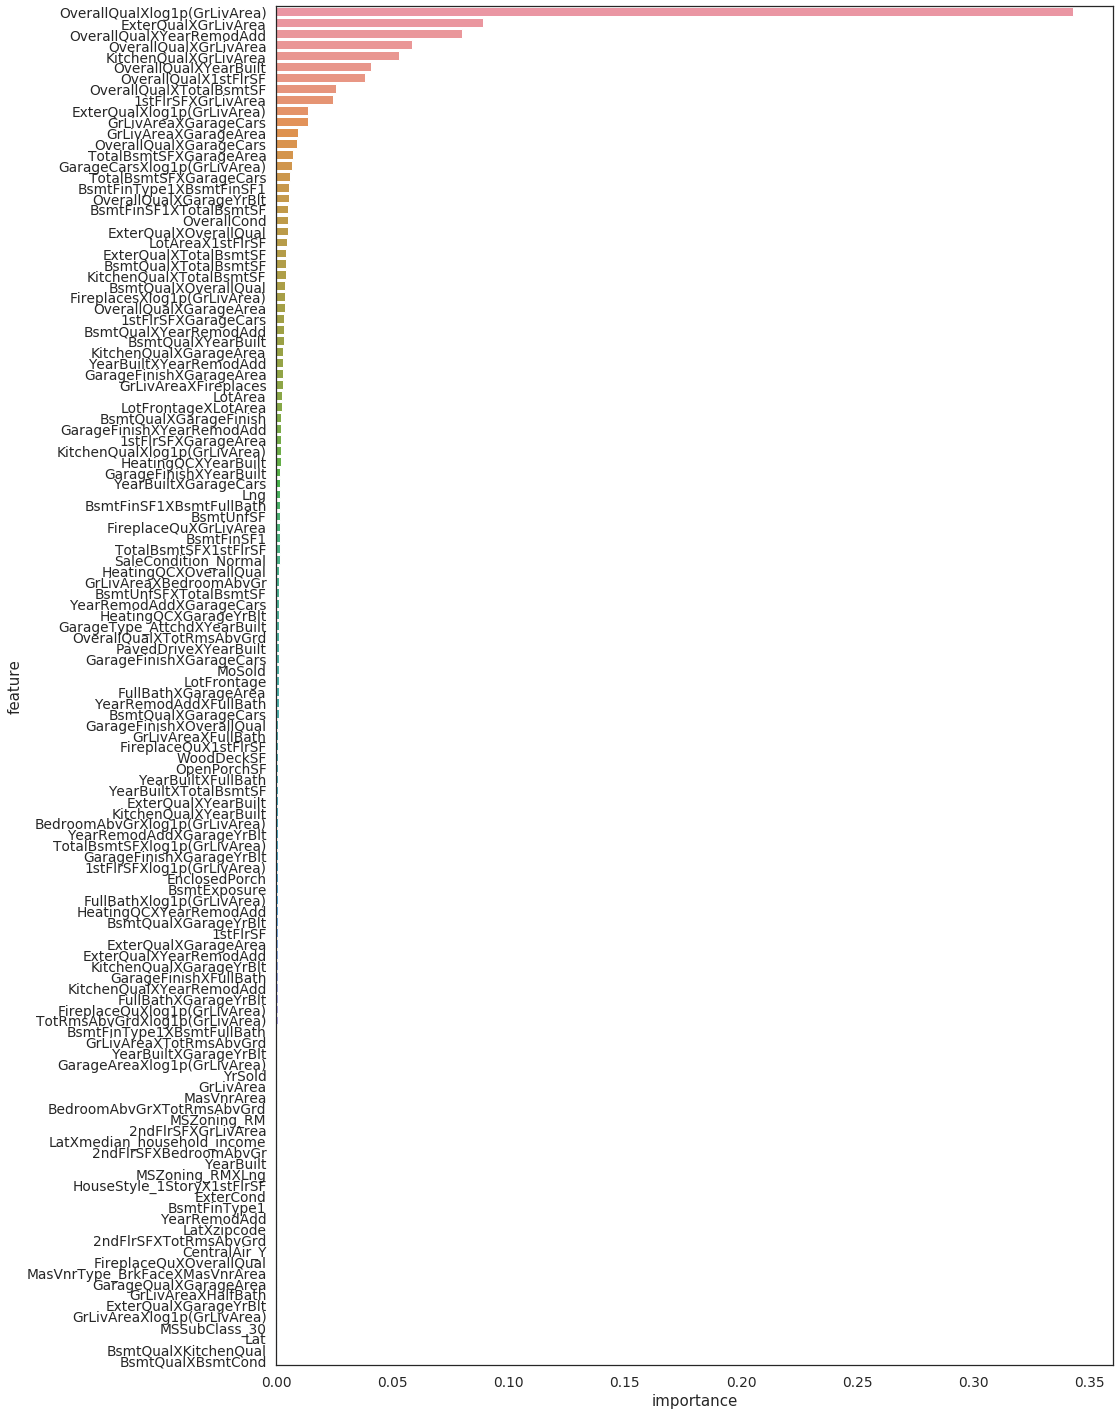

In [54]:
plt.figure(figsize=(15,25))
sns.barplot(y='feature',x='importance',data=feature_importance[feature_importance['importance']>0.0003],orient='h')

In [55]:
cv5_accuracy_train = cv_rmse(rf, X_train, y_train, cv=5)
cv5_accuracy_test = cv_rmse(rf, X_test, y_test, cv=5)

print('CV5 train R-sq:',cv5_accuracy_train)
print('-'*75)
print('CV5 test R-sq:', cv5_accuracy_test)

model_list.append(models(name='rf',params=rf.get_params(),
                         cv5_mean_accuracy_train = np.mean(cv5_accuracy_train),
                         cv5_std_accuracy_train=np.std(cv5_accuracy_train),
                         cv5_mean_accuracy_test=np.mean(cv5_accuracy_test),
                         cv5_std_accuracy_test=np.std(cv5_accuracy_test)))

CV5 train R-sq: [0.11786918 0.14631162 0.12120068 0.17135595 0.14044871]
---------------------------------------------------------------------------
CV5 test R-sq: [0.14908898 0.10790815 0.14674151 0.13910444 0.12184361]


## **Adaptive Boost (AdaBoost)**

In [56]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [57]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=75,
                                                             min_samples_leaf=3,
                                                             min_samples_split= 4),
                       n_estimators=200,learning_rate=0.5,random_state=42)

ada.fit(X_train,y_train)

y_pred = ada.predict(X_test)

print('R-sq:',r2_score(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq:',r2_score(y_test_exp,y_pred_exp))
print('MSE:',mean_squared_error(y_test_exp,y_pred_exp))
print('RMSE:',np.sqrt(mean_squared_error(y_test_exp,y_pred_exp)))

R-sq: 0.8858706979967634
MSE: 0.0158979560608233
RMSE: 0.12608709712267666
--------------------------------------------------
R-sq: 0.8926934355896705
MSE: 534241858.7233434
RMSE: 23113.672549453135


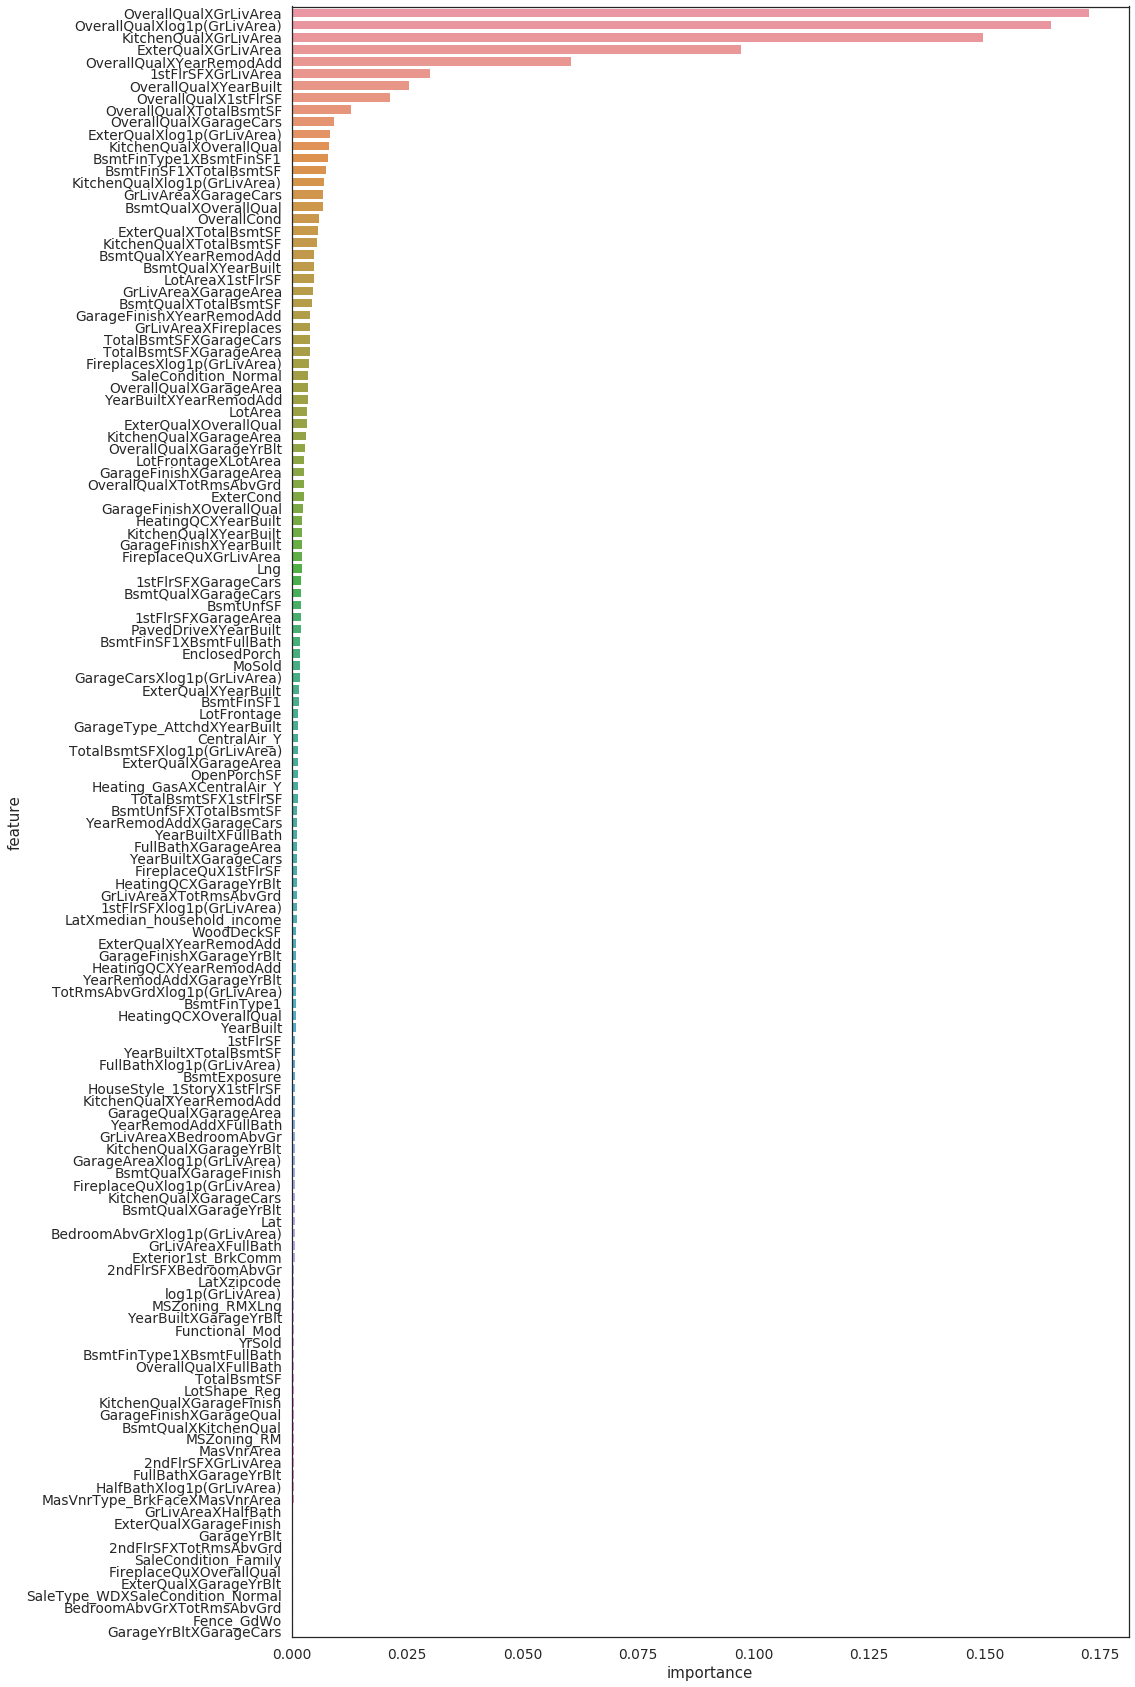

In [58]:
feature_importance = pd.DataFrame(np.round(ada.feature_importances_,decimals=4),
                                  index=X_train.columns,columns=['importance']).sort_values(by='importance',
                                                                                            ascending=False)
feature_importance.index.name = 'feature'
feature_importance.reset_index(inplace = True)

plt.figure(figsize=(15,30))
sns.barplot(y='feature',x='importance',data=feature_importance[feature_importance['importance']>0.0003],orient='h')

In [59]:
with open('ada_mod.pkl','rb') as mod_file:
    ada_cv = pickle.load(mod_file)

/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.21.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator AdaBoostRegressor from version 0.21.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/climbach/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.21.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [60]:
ada = ada_cv.best_estimator_
ada.fit(X_train,y_train)

y_pred = ada.predict(X_test)

print('R-sq:',r2_score(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq:',r2_score(y_test_exp,y_pred_exp))
print('MSE:',mean_squared_error(y_test_exp,y_pred_exp))
print('RMSE:',np.sqrt(mean_squared_error(y_test_exp,y_pred_exp)))

R-sq: 0.8863459859816989
MSE: 0.015831749509410877
RMSE: 0.125824280285686
--------------------------------------------------
R-sq: 0.8932088148972661
MSE: 531675965.3807465
RMSE: 23058.099778185246


In [61]:
cv5_accuracy_train =  cv_rmse(ada, X_train, y_train, cv=5)
cv5_accuracy_test =  cv_rmse(ada, X_test, y_test, cv=5)

print('CV5 train R-sq:',cv5_accuracy_train)
print('-'*75)
print('CV5 test R-sq:', cv5_accuracy_test)

model_list.append(models(name='ada',params=ada.get_params(),
                         cv5_mean_accuracy_train = np.mean(cv5_accuracy_train),
                         cv5_std_accuracy_train=np.std(cv5_accuracy_train),
                         cv5_mean_accuracy_test=np.mean(cv5_accuracy_test),
                         cv5_std_accuracy_test=np.std(cv5_accuracy_test)))

CV5 train R-sq: [0.1173834  0.14316071 0.12214402 0.17042844 0.15332375]
---------------------------------------------------------------------------
CV5 test R-sq: [0.15198614 0.10655061 0.15280728 0.12464098 0.11695284]


## **Gradient Boost**

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
gbrt = GradientBoostingRegressor()
gbrt.fit(X_train,y_train)
y_pred = gbrt.predict(X_test)

print('Test accuracies:')
print('-'*50)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq orig price:', r2_score(y_test_exp, y_pred_exp))
print('MSE orig price:', mean_squared_error(y_test_exp, y_pred_exp))
print('RMSE orig price:', np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))

Test accuracies:
--------------------------------------------------
R-sq: 0.8938088493749073
MSE: 0.014792189359382186
RMSE: 0.12162314483428796
--------------------------------------------------
R-sq orig price: 0.8936732649510584
MSE orig price: 529363630.98270047
RMSE orig price: 23007.903663365345


In [64]:
cv5_accuracy_train =  cv_rmse(gbrt, X_train, y_train, cv=5)
cv5_accuracy_test =  cv_rmse(gbrt, X_test, y_test, cv=5)

print('CV5 train R-sq:',cv5_accuracy_train)
print('-'*75)
print('CV5 test R-sq:', cv5_accuracy_test)

model_list.append(models(name='gbrt',params=gbrt.get_params(),
                         cv5_mean_accuracy_train = np.mean(cv5_accuracy_train),
                         cv5_std_accuracy_train=np.std(cv5_accuracy_train),
                         cv5_mean_accuracy_test=np.mean(cv5_accuracy_test),
                         cv5_std_accuracy_test=np.std(cv5_accuracy_test)))

CV5 train R-sq: [0.11276318 0.13067849 0.10633234 0.16309766 0.12263623]
---------------------------------------------------------------------------
CV5 test R-sq: [0.14102837 0.10631542 0.14385652 0.11778551 0.12331199]


In [65]:
mod_table = pd.DataFrame()
for model in model_list:
    tmp_df = pd.DataFrame([model.name,
                           model.cv5_mean_accuracy_train,
                           model.cv5_std_accuracy_train,
                           model.cv5_mean_accuracy_test,
                           model.cv5_std_accuracy_test],
                          index=['model',
                                   'train_mean_ac',
                                   'train_std_ac',
                                   'test_mean_ac',
                                   'test_std_ac']).T
    
    mod_table = pd.concat([mod_table,tmp_df],axis=0)
    
mod_table.reset_index(drop=True,inplace=True)

In [66]:
for col in mod_table.columns:
    if col != 'model':
        mod_table[col]= mod_table[col].astype(float)

In [67]:
mod_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
model            7 non-null object
train_mean_ac    7 non-null float64
train_std_ac     7 non-null float64
test_mean_ac     7 non-null float64
test_std_ac      7 non-null float64
dtypes: float64(4), object(1)
memory usage: 360.0+ bytes


Text(0.5, 1.0, 'Train vs. Test RMSE')

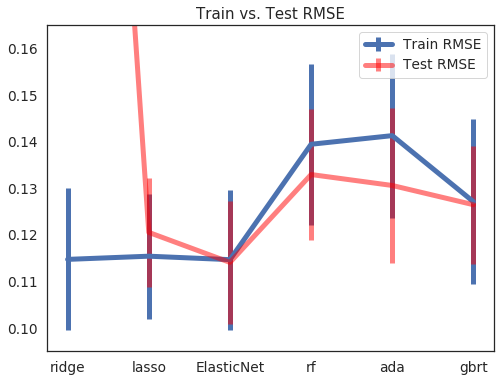

In [68]:
train_errorbar_width_array = (mod_table.loc[1:,'train_std_ac']/np.sqrt(5))*2

plt.figure(figsize =(8,6))
plt.errorbar(x=mod_table.loc[1:,'model'],
             y=mod_table.loc[1:,'train_mean_ac'],
             yerr=train_errorbar_width_array,
             label='Train RMSE',
             linewidth=5)

test_errorbar_width_array = (mod_table.loc[1:,'test_std_ac']/np.sqrt(5))*2
plt.errorbar(x=mod_table.loc[1:,'model'],
             y=mod_table.loc[1:,'test_mean_ac'],
             yerr=test_errorbar_width_array,
             label='Test RMSE',
             linewidth=5,
             color='red',
             alpha =0.5)
plt.legend()
plt.ylim(0.095,0.165)
plt.title('Train vs. Test RMSE')

In [69]:
mod_table.sort_values(by=['test_mean_ac','test_std_ac'],ascending=[True,True])

,model,train_mean_ac,train_std_ac,test_mean_ac,test_std_ac
3,ElasticNet,0.114668,0.016804,0.114079,0.014718
2,lasso,0.115412,0.014989,0.120520,0.013074
6,gbrt,0.127102,0.019826,0.126460,0.014183
5,ada,0.141288,0.019675,0.130588,0.018712
4,rf,0.139437,0.019312,0.132937,0.015742
1,ridge,0.114727,0.017040,0.375336,0.097613
0,LR,0.247654,0.140567,9.388362,5.255288
